# Social Evolution Simulations

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Barebones Model

This model is a society of $n$ many people and the society lives over time horizon $T$. Here, we represent the wealth of the population at time $t\in \{1,2,\ldots,T\}$ as a vector $\mathbf{x_t} = \begin{pmatrix}x^1_t & \ldots &x^n_t \end{pmatrix}'$. To summarize this society's features at any point in time $t$, we calculate both the gini index and aggregate wealth of the population (as the sum $x^{agg}_t = \sum_{i=1}^n x^i_t$). 

The main equation that dictates the motion of this society is $x^k_t = \max\{0, x^k_{t-1} + \epsilon^k_t\}$, it says that at time $t$, an individual $k$'s wealth is determined by the max between 0 and their past wealth plus a shock that has a gaussian distribution.

In [3]:
# Population of the society
n = 10000

# Time Horizon
T = 1000

# Wealth objects
wealth_dist = np.zeros((n,T))
wealth_agg = np.zeros(T)
min_wealth = np.zeros(n)

# Wealth Shock Parameters
w_sh_mean = 0
w_sh_std = 1

# Socioeconomic satisfaction
gini = np.zeros(T)

# Gini Index Calculation Helper
def gini_calc(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumx = np.cumsum(sorted_x, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [4]:
# Produce and store the shocks
w_sh = np.random.normal(w_sh_mean, w_sh_std, size = (n, T))

# Running the simulation
for i in range(T):
    if i == 0:
        wealth_dist[:, i] = np.maximum(w_sh[:, i], min_wealth)
    else:
        wealth_dist[:, i] = np.maximum(wealth_dist[:, i-1] + w_sh[:, i], min_wealth)
    wealth_agg[i] = sum(wealth_dist[:, i])
    gini[i] = gini_calc(wealth_dist[:, i])

<function matplotlib.pyplot.show(close=None, block=None)>

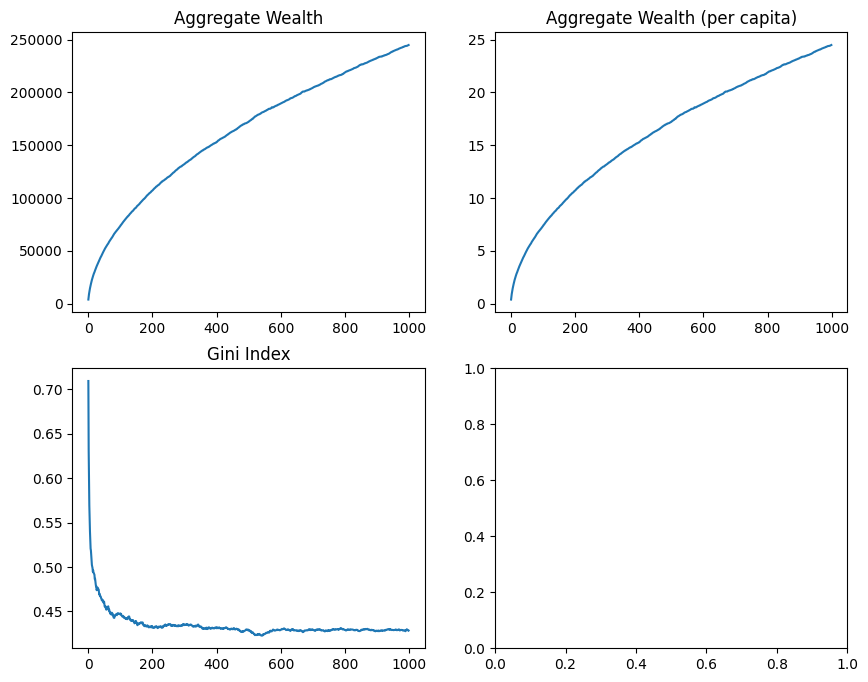

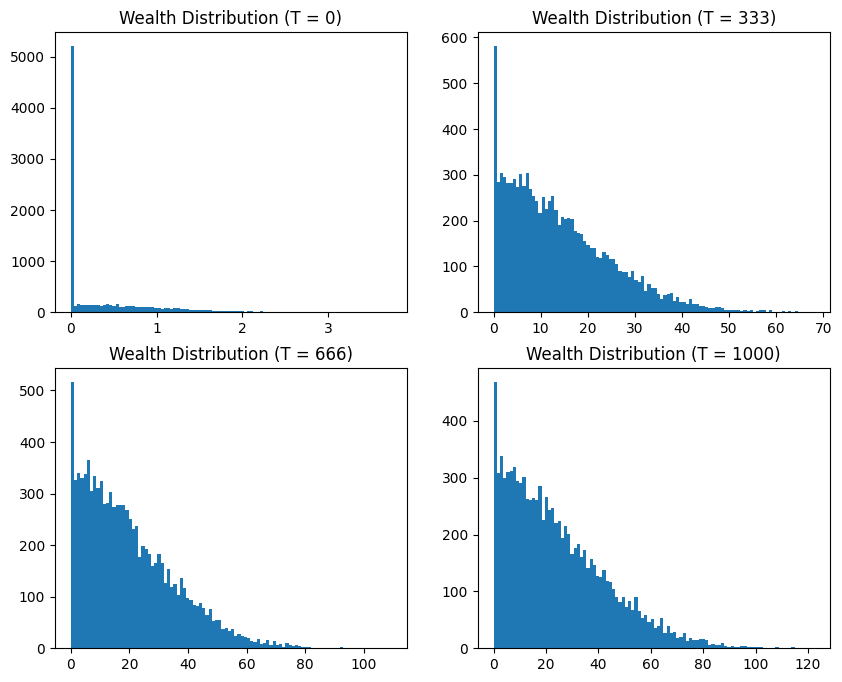

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig_dist, axs_dist = plt.subplots(2, 2, figsize=(10, 8))

xs = range(T)

axs[0,0].plot(xs, wealth_agg)
axs[0,1].plot(xs, wealth_agg / n)
axs[1,0].plot(xs, gini)

axs[0,0].set_title('Aggregate Wealth')
axs[0,1].set_title('Aggregate Wealth (per capita)')
axs[1,0].set_title('Gini Index')


axs_dist[0,0].hist(wealth_dist[:, 0], bins = int(n/100))
axs_dist[0,0].set_title("Wealth Distribution (T = " + str(0) + ")")

axs_dist[0,1].hist(wealth_dist[:, int(T/3)], bins = int(n/100))
axs_dist[0,1].set_title("Wealth Distribution (T = " + str(int(T/3)) + ")")

axs_dist[1,0].hist(wealth_dist[:, int(2*T/3)], bins = int(n/100))
axs_dist[1,0].set_title("Wealth Distribution (T = " + str(int(2*T/3)) + ")")

axs_dist[1,1].hist(wealth_dist[:, T-1], bins = int(n/100))
axs_dist[1,1].set_title("Wealth Distribution (T = " + str(T) + ")")



plt.show

This is a pretty simple setup but I feel like it yeilds some really interesting insights. The first is that absent any external mechanisms, inequality in this model (as measure by the gini index) starts out very high and converges to some rate around $0.43$. This trend is also consistent over multiple runs of the simulation as well. It's hard to tell if this long-term trend is something that we can see in the data, however, since most countries didn't start tracking data relevant to make these gini calculations until at least the 1960s.

The society depicted here, is of course nothing close to reality. The wealth distributions are not a realistic picture of what happens for the US at least (as there would be some outliers that are far out to the right)